In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [ ]:
print(train_data.columns.values)
train_data.describe()
train_data.describe(include=['O'])

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ibrahim Shawah, Mr. Yousseff",male,347082,G6,S
freq,1,577,7,4,644


Text(0.5, 1.0, 'combine')

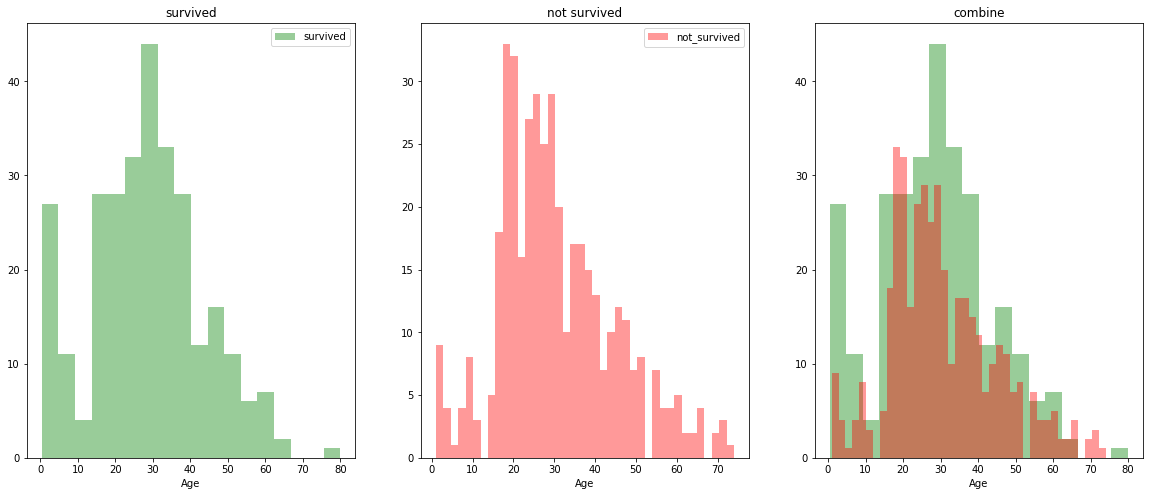

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
ax = sns.distplot(train_data[train_data['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False, color="green")
ax.legend()
ax.set_title('survived')
ax = sns.distplot(train_data[train_data['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False, color="red")
ax.legend()
ax.set_title('not survived')
ax = sns.distplot(train_data[train_data['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[2], kde =False, color="green")
ax = sns.distplot(train_data[train_data['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[2], kde = False, color="red")
ax.set_title('combine')

1. Young passengers had high survival rate, and old passengers had low survival rate.
2. Most passengers are in 15-35 age range, and many passengers in this range did not survive.

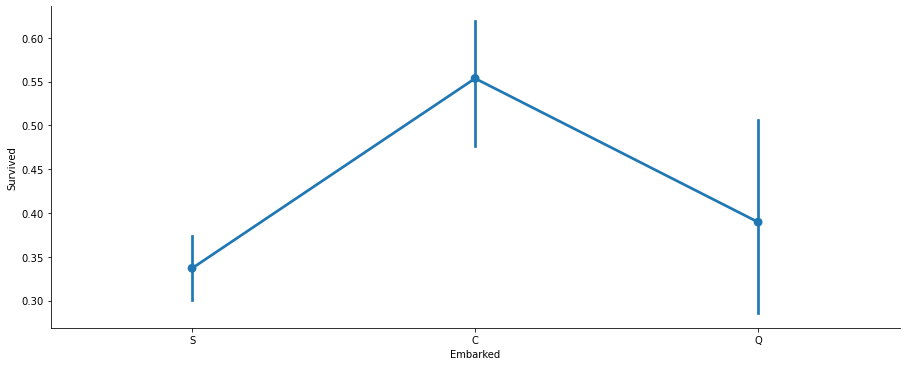

In [ ]:
sns.factorplot('Embarked','Survived', data=train_data, aspect = 2.5)

Passengers from port ‘Southampton’ have a low survival rate of 34%, from the port ‘Cherbourg’ have a survival rate of 55%, from the port ‘Queenstown’ have a survival rate of 39%

In [ ]:

train_data = train_data.drop('Ticket', axis=1)
test_data = test_data.drop('Ticket', axis=1)

ticket number is random, so we drop this column

In [ ]:
combine = [train_data, test_data]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir','Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Certain titles mostly survived or did not

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

# Pclass

In [ ]:
print(train_data[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


People with higher tier of class are more likely to survived with 20 percent difference within adjacent tiers. 

# SibSp

In [ ]:
print(train_data[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


People who traveled with 1 or 2 siblings or spouse are higher rate of survival compare to people who travled with 3 sibsp or more. People who traveled alone (sibsp + parch = 0) have survival rate over than one third.

# Fare

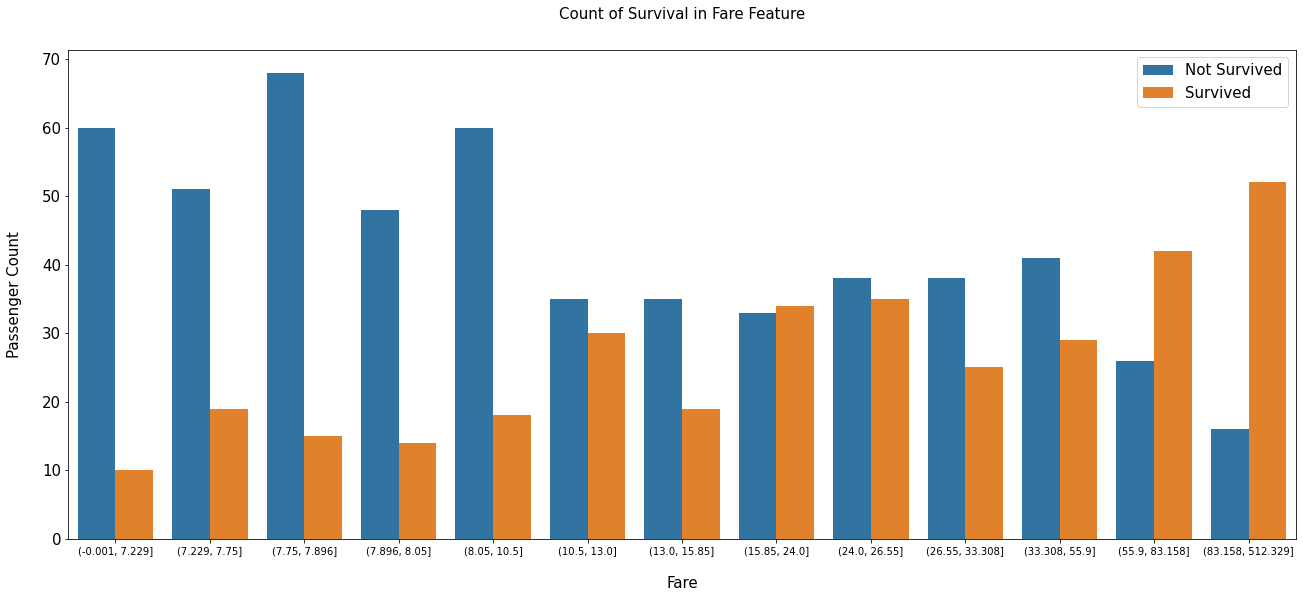

In [ ]:
data1 = pd.read_csv('./data/train.csv')
data1['Fare'] = pd.qcut(data1['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=data1)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

People in the group of higher fare have higher rate of survival compare to people with lower fare, this indicates either of two things, people travel with family or having an expensive cabin are more likely to survive.

# Cabin

In [ ]:
cabinisnull = train_data['Cabin'].isnull().sum()
cabinnotnull = train_data['Cabin'].count()
totalnum = train_data['PassengerId'].count()
print(cabinisnull/totalnum)
print(cabinnotnull/totalnum)
print(cabinisnull)
print(totalnum)

0.7710437710437711
0.22895622895622897
687
891


In [ ]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

The Cabin data has too much null (687 out of 891 rows, about 77%) that it might not be good feature. However, it can help craft other features.  

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


We can drop name and passengerID

# Sex

In [ ]:
train_data['isMale'] = 1
train_data['isMale'].loc[train_data['Sex']=='female'] = 0
train_data['isFemale'] = 1
train_data['isFemale'].loc[train_data['Sex']=='male'] = 0

In [ ]:
male = train_data.loc[train_data.Sex == 'male']['Survived']
female = train_data.loc[train_data.Sex == 'female']['Survived']
malesurrate = sum(male)/len(male)
femalesurrate = sum(female)/len(female)
print(sum(male))
print(len(male))
print(malesurrate)
print(sum(female))
print(len(female))
print(femalesurrate)

109
577
0.18890814558058924
233
314
0.7420382165605095


Sex has high correlation (+-0.543) with survival in the training data set, which means gender may be a strong factor alone.  
Women have survival rate 0.7420382165605095, while men have much lower survival rate  0.18890814558058924  


| Gender\Number | Total | Survived | Survival Rate |
| ------------- | ----- | -------- | ------------- |
|     Women          |314|233|74.20%|
| Men         | 577  | 109     |18.89%|

# Parch

In [ ]:
train_data.value_counts(['Parch'])
parchsur = list()
parchstat = list()
for i in range(0,7):
  parchsur.append(train_data.loc[train_data.Parch == i]['Survived'])
  parchstat.append((sum(parchsur[i]), len(parchsur[i])))

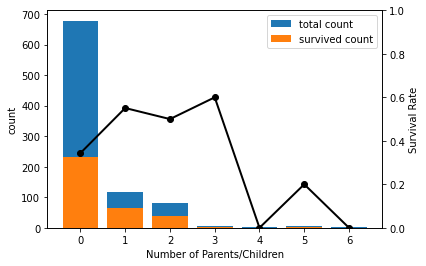

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()        
host =  fig.add_subplot(111) 
par2 = host.twinx()
x = (0,1,2,3,4,5,6)
y = [x[0] for x in parchstat] 
y2 = [x[1] for x in parchstat] 
yy = [x[0]/x[1] for x in parchstat]
host.bar(x,y2,align='center',label='total count')
host.bar(x,y,align='center',label='survived count') 
par2.plot(x, yy, linewidth=2, marker='o', color = 'black', label='survival rate')
host.legend(loc = 'upper right')
par2.set_ylim(0,1)
host.set_ylabel("count")
par2.set_ylabel("Survival Rate")
host.set_xlabel('Number of Parents/Children')
plt.show()

Parch describe number of one's parents/children, range from 0 to 6.  
The relation to the survival rate shown in the plot.  
detail:


| Parch         | 0     | 1     | 2     | 3     | 4    | 5     | 6    |
| ------------- | ----- | ----- | ----- | ----- | ---- | ----- | ---- |
| Total         | 678   | 118   | 80    | 5     | 4    | 5     | 1    |
| Survived      | 233   | 65    | 40    | 3     | 0    | 1     | 0    |
| Survival Rate | 34.3% | 55.0% | 50.0% | 60.0% | 0.0% | 20.0% | 0.0% |

# Family&Single  
Family is simply Parch+Sibsp, and isSingle is family=0.

In [ ]:
train_data['Family']=0
train_data['Family']=train_data.Parch + train_data.SibSp
train_data['isSingle']=0
train_data['isSingle'].loc[train_data.Family==0] = 1
train_data.value_counts(['Family'])

Family
0         537
1         161
2         102
3          29
5          22
4          15
6          12
10          7
7           6
dtype: int64

In [ ]:
train_data.value_counts(['Family'])
Fsur = list()
Fstat = list()
for i in range(0,11):
  Fsur.append(train_data.loc[train_data.Family == i]['Survived'])
  Fstat.append((sum(Fsur[i]), len(Fsur[i])))
print([x[1] for x in Fstat] )

[537, 161, 102, 29, 15, 22, 12, 6, 0, 0, 7]


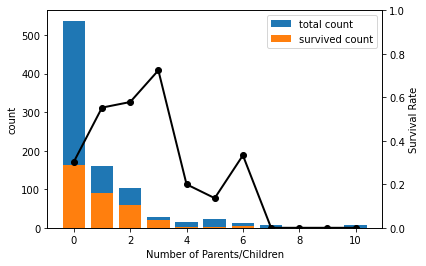

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()        
host =  fig.add_subplot(111) 
par2 = host.twinx()
x = (0,1,2,3,4,5,6,7,8,9,10)
y = [x[0] for x in Fstat] 
y2 = [x[1] for x in Fstat] 
yy = list()
for ii in Fstat:
  if ii[0]!=0:
    yy.append(ii[0]/ii[1])
  else:
    yy.append(0)
host.bar(x,y2,align='center',label='total count')
host.bar(x,y,align='center',label='survived count') 
par2.plot(x, yy, linewidth=2, marker='o', color = 'black', label='survival rate')
host.legend(loc = 'upper right')
par2.set_ylim(0,1)
host.set_ylabel("count")
par2.set_ylabel("Survival Rate")
host.set_xlabel('Number of Parents/Children')
plt.show()

In [ ]:
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,isMale,isFemale,Family,isSingle
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.407753,-0.543351,0.543351,0.016639,-0.203367
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.173929,0.131900,-0.131900,0.065997,0.135207
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.104766,0.093254,-0.093254,-0.301914,0.198270
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.269623,-0.114631,0.114631,0.890712,-0.584471
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.315784,-0.245489,0.245489,0.783111,-0.583398
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.136310,-0.182333,0.182333,0.217138,-0.271832
Title,0.407753,-0.173929,-0.104766,0.269623,0.315784,0.136310,1.000000,-0.502713,0.502713,0.342039,-0.405813
isMale,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-0.502713,1.000000,-1.000000,-0.200988,0.303646
isFemale,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.502713,-1.000000,1.000000,0.200988,-0.303646
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,0.342039,-0.200988,0.200988,1.000000,-0.690922


In [ ]:
singlesur =  train_data.loc[train_data.isSingle==1]['Survived']
nsinglesur = train_data.loc[train_data.isSingle==0]['Survived']
ssrate = sum(singlesur)/len(singlesur)
nsrate = sum(nsinglesur)/len(nsinglesur)
print(ssrate)
print(nsrate)

0.30353817504655495
0.5056497175141242


The correlation with survived is not higher using Family, but is higher using isSingle(-0.2).  
People had no other family member had lower survival rate (0.303), while others had higher (0.505).  

In [ ]:
test_data['isMale'] = 1
test_data['isMale'].loc[train_data['Sex']=='female'] = 0
test_data['isFemale'] = 1
test_data['isFemale'].loc[train_data['Sex']=='male'] = 0
test_data['Family']=0
test_data['Family']=train_data.Parch + train_data.SibSp
test_data['isSingle']=0
test_data['isSingle'].loc[train_data.Family==0] = 1

In [ ]:
freq_port = train_data.Embarked.dropna().mode()[0]
combine = [train_data, test_data]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

<AxesSubplot:>

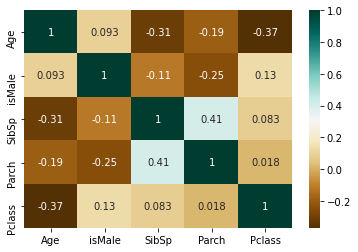

In [ ]:
sns.heatmap(train_data[["Age","isMale","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

Age is negatively correlated with Pclass and SibSp.

In [ ]:
guess_ages = np.zeros((9,3))
for dataset in combine:
    for i in range(0, 9):
        for j in range(0, 3):
            guess_df = dataset[(dataset['SibSp'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            if np.isnan(age_guess):
                continue
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5           
    for i in range(0, 9):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.SibSp == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
combine = [train_data, test_data]

In [ ]:
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_data = train_data.drop(['Sex'], axis=1)
test_data = test_data.drop(['Sex'], axis=1)
combine = [train_data, test_data]

In [ ]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)  
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,isMale,isFemale,Family,isSingle
0,0,3,1,1,0,0,0,1,1,0,1,0
1,1,1,2,1,0,3,1,3,0,1,1,0
2,1,3,1,0,0,1,0,2,0,1,0,1
3,1,1,2,1,0,3,0,3,0,1,1,0
4,0,3,2,0,0,1,0,1,1,0,0,1


# Gradient Boosting Classfication

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
GBC = GradientBoostingClassifier(random_state = 2)
kfold = StratifiedKFold(n_splits=10, shuffle=True)

splitting training set & validating set

In [ ]:
X = train_data.drop(["Survived"], axis=1)
y = train_data["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.15)

simple test for cross-validation score

In [ ]:
GbcCv = cross_val_score(GBC, X = X_train, y = y_train, scoring = "accuracy", cv = kfold)

In [ ]:
GbcCv.mean()

0.8229298245614034

test with all default parameters

In [ ]:
gbcclf = GradientBoostingClassifier()
gbcclf.fit(X_train, y_train)
y_predict =  gbcclf.predict(X_val)

In [ ]:
cm = confusion_matrix(y_val, y_predict)
print("accuracy:",(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
print("precision:",(cm[0][0])/(cm[0][0]+cm[0][1]))
print("recall:",cm[0][0]/(cm[0][0]+cm[1][0]))

accuracy: 0.8805970149253731
precision: 0.9146341463414634
recall: 0.8928571428571429


use grid search to tune parameters

In [ ]:
gbcparam = {"learning_rate":[0.005, 0.01], "n_estimators":[100,300,500], "max_depth":[2,3,4], "max_features":[0.1, 0.3, 0.5, 1.0]}
gridsearchclf = GridSearchCV(GradientBoostingClassifier(), param_grid = gbcparam, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.1min finished


0.8327715355805243
{'learning_rate': 0.005, 'max_depth': 4, 'max_features': 0.3, 'n_estimators': 500}


In [ ]:
gbcparam = {"loss":["deviance","exponential"], "criterion":["friedman_mse","mse","mae"],"learning_rate":[0.005, 0.01, 0.5], "n_estimators":[100,300,500], "max_depth":[2,4,6], "max_features":[0.1, 0.3, 0.5]}
gridsearchclf = GridSearchCV(GradientBoostingClassifier(), param_grid = gbcparam, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

Fitting 10 folds for each of 486 candidates, totalling 4860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:  1.5min


In [ ]:
gbcparam = {"loss":["deviance"], "criterion":["friedman_mse"],"learning_rate":[0.01], "n_estimators":[300,500,800], "max_depth":[3,4,5], "max_features":[0.1, 0.3, 0.5, 0.7, 1.0]}
gridsearchclf = GridSearchCV(GradientBoostingClassifier(), param_grid = gbcparam, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.2min finished


0.8304993757802747
{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.1, 'n_estimators': 300}


final model for gradient boosting

In [ ]:
gbcclf = GradientBoostingClassifier(learning_rate=0.01,criterion="friedman_mse", loss="deviance", max_depth=3, max_features=0.5, n_estimators=300)
gbcclf.fit(X_train, y_train)
y_predict =  gbcclf.predict(X_val)

In [ ]:
cm = confusion_matrix(y_val, y_predict)
print("accuracy:",(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
print("precision:",(cm[0][0])/(cm[0][0]+cm[0][1]))
print("recall:",cm[0][0]/(cm[0][0]+cm[1][0]))

accuracy: 0.8880597014925373
precision: 0.8780487804878049
recall: 0.935064935064935


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

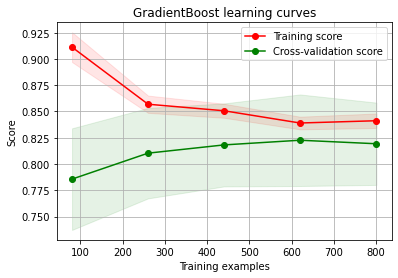

In [ ]:
plot_learning_curve(gbcclf,"GradientBoost learning curves",X_train,Y_train,cv=kfold)

# Ada-Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
train_data["Survived"] = train_data["Survived"].astype(int)
Y_train = train_data["Survived"]

X_train = train_data.drop(labels = ["Survived"],axis = 1)

DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, n_estimators=50,  random_state=5 )

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   10.3s finished


0.8081023720349562

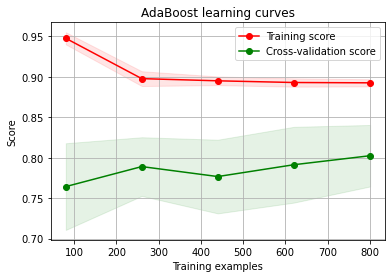

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)

# SVM

In [ ]:
from sklearn.svm import SVC
svmclf = SVC()
kfold = StratifiedKFold(n_splits=10, shuffle=True)
X = train_data.drop(["Survived"], axis=1)
y = train_data["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.15)

simple test for cross-validation score

In [ ]:
SvmCv = cross_val_score(svmclf, X = X, y = y, scoring = "accuracy", cv = kfold)
SvmCv.mean()

0.828314606741573

test with default parameters

In [ ]:
svmclf.fit(X_train, y_train)
y_predict =  svmclf.predict(X_val)
cm = confusion_matrix(y_val, y_predict)
print("accuracy:",(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
print("precision:",(cm[0][0])/(cm[0][0]+cm[0][1]))
print("recall:",cm[0][0]/(cm[0][0]+cm[1][0]))

accuracy: 0.8955223880597015
precision: 0.926829268292683
recall: 0.9047619047619048


tuning parameters

In [ ]:
svmparam = {"kernel":["linear","poly","rbf","sigmoid"]}
gridsearchclf = GridSearchCV(SVC(probability=1), param_grid = svmparam, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.9s finished


0.8270911360799001
{'kernel': 'rbf'}


In [ ]:
svmparam = {"kernel":["poly","rbf"], "C":[0.1,1,10], "gamma":[0.1,1,10]}
gridsearchclf = GridSearchCV(SVC(probability=1), param_grid = svmparam, cv=kfold, scoring="accuracy", verbose = 4)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.856, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.820, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.798, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.775, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.865, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.787, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s



[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.809, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.809, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.820, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.854, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.856, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.831, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.753, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] 

In [ ]:
svmparam = {"kernel":["rbf"], "C":[10,100,1000], "gamma":[0.001,0.01,0.1]}
gridsearchclf = GridSearchCV(SVC(probability=1), param_grid = svmparam, cv=kfold, scoring="accuracy", verbose = 1)
gridsearchclf.fit(X, y)
print(gridsearchclf.best_score_)
print(gridsearchclf.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8316354556803995
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    5.3s finished


final SVC model

In [ ]:
svmclf = SVC(C=100, gamma=0.01, kernel="rbf", probability=1)
svmclf.fit(X_train, y_train)
y_predict =  svmclf.predict(X_val)
cm = confusion_matrix(y_val, y_predict)
print("accuracy:",(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
print("precision:",(cm[0][0])/(cm[0][0]+cm[0][1]))
print("recall:",cm[0][0]/(cm[0][0]+cm[1][0]))

accuracy: 0.8955223880597015
precision: 0.926829268292683
recall: 0.9047619047619048


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

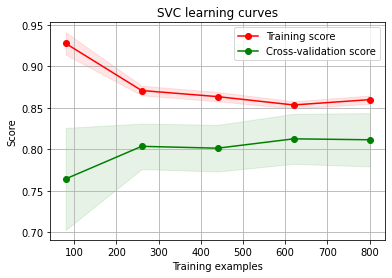

In [ ]:
plot_learning_curve(svmclf,"SVC learning curves",X_train,Y_train,cv=kfold)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
single_best_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1)

In [ ]:
single_best_model.fit(X_train, y_train)
y_pred=single_best_model.predict(X_val)
print("Accuracy:", sklearn.metrics.accuracy_score(y_val, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished


Accuracy: 0.8507462686567164


## Feature Importance

No handles with labels found to put in legend.


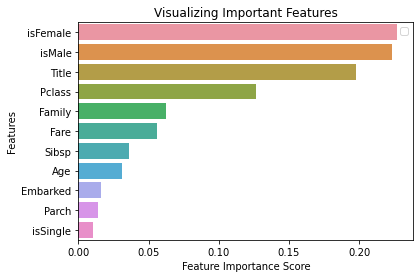

In [ ]:
imp = pd.Series(single_best_model.feature_importances_,index=['Pclass', 'Age', 'Sibsp', 'Parch', 'Fare', 'Embarked', 'Title', 'isMale', 'isFemale', 'Family', 'isSingle']).sort_values(ascending=False)

sns.barplot(x=imp, y=imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Eliminate the least two important features

In [ ]:
X2 = train_data.drop(['Survived', 'Parch', 'isSingle'], axis=1)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y, shuffle=True, test_size=0.15)

single_best_model.fit(X_train2, y_train2)
y_pred2=single_best_model.predict(X_val2)
print("Accuracy:", sklearn.metrics.accuracy_score(y_val2, y_pred2))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s


Accuracy: 0.8208955223880597


[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished


# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
Y_train = train_data["Survived"]
X_train = train_data.drop(labels = ["Survived"],axis = 1)
votingC = VotingClassifier(estimators=[('gbc', gbcclf),
 ('adac',ada_best),('svc', svmclf),('rf',single_best_model)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

test_Survived = pd.Series(votingC.predict(test_data.drop(labels = ["PassengerId"],axis = 1)), name="Survived")

results = pd.concat([test_data["PassengerId"],test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.4s finished


# further adjustment

## turn numberic variables into 0/1 category variables

In [ ]:
train_data['Pclass'].value_counts()
train_data['Pc1']=0
train_data['Pc2']=0
train_data['Pc3']=0
train_data['Pc1'].loc[train_data['Pclass']==1] = 1
train_data['Pc2'].loc[train_data['Pclass']==2] = 1
train_data['Pc3'].loc[train_data['Pclass']==3] = 1

In [ ]:
train_data['Age'].value_counts()
train_data['0-Age']=0
train_data['1-Age']=0
train_data['2-Age']=0
train_data['3-Age']=0
train_data['4-Age']=0
train_data['0-Age'].loc[train_data['Age']==0] = 1
train_data['1-Age'].loc[train_data['Age']==1] = 1
train_data['2-Age'].loc[train_data['Age']==2] = 1
train_data['3-Age'].loc[train_data['Age']==3] = 1
train_data['4-Age'].loc[train_data['Age']==4] = 1

In [ ]:
print(train_data[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


SibSp less than 3 has more samples and suvival rates are quite different, so grouping by SibSp=0/1/2/3+, where 3+ has less samples so less meaningful

In [ ]:
train_data['SibSp'].value_counts()
train_data['0-SibSp']=0
train_data['1-SibSp']=0
train_data['2-SibSp']=0
train_data['3+SibSp']=0
train_data['0-SibSp'].loc[train_data['SibSp']==0] = 1
train_data['1-SibSp'].loc[train_data['SibSp']==1] = 1
train_data['2-SibSp'].loc[train_data['SibSp']==2] = 1
train_data['3+SibSp'].loc[train_data['SibSp']>=3] = 1

In [ ]:
print(train_data[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


Parch is in similar situation as SibSp, so do the same thing

In [ ]:
train_data['Parch'].value_counts()
train_data['0-Parch']=0
train_data['1-Parch']=0
train_data['2-Parch']=0
train_data['3+Parch']=0
train_data['0-Parch'].loc[train_data['Parch']==0] = 1
train_data['1-Parch'].loc[train_data['Parch']==1] = 1
train_data['2-Parch'].loc[train_data['Parch']==2] = 1
train_data['3+Parch'].loc[train_data['Parch']>=3] = 1

In [ ]:
print(train_data[['Parch', 'Survived']].groupby('Parch', as_index=False).mean())
print(train_data['Parch'].value_counts())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Similarly, grouping br Family=1/2/3/4+ (where=0 is already in 'isSingle')

In [ ]:
train_data['1-Family']=0
train_data['2-Family']=0
train_data['3-Family']=0
train_data['4+Family']=0
train_data['1-Family'].loc[train_data['Family']==1] = 1
train_data['2-Family'].loc[train_data['Family']==2] = 1
train_data['3-Family'].loc[train_data['Family']==3] = 1
train_data['4+Family'].loc[train_data['Family']>=4] = 1

In [ ]:
print(train_data[['Family', 'Survived']].groupby('Family', as_index=False).mean())
print(train_data['Family'].value_counts())

   Family  Survived
0       0  0.303538
1       1  0.552795
2       2  0.578431
3       3  0.724138
4       4  0.200000
5       5  0.136364
6       6  0.333333
7       7  0.000000
8      10  0.000000
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64


In [ ]:
print(train_data[['Fare', 'Survived']].groupby('Fare', as_index=False).mean())

   Fare  Survived
0     0  0.197309
1     1  0.308756
2     2  0.445415
3     3  0.581081


different Fare also has quite different survival rate

In [ ]:
train_data['0-Fare']=0
train_data['1-Fare']=0
train_data['2-Fare']=0
train_data['3-Fare']=0
train_data['0-Fare'].loc[train_data['Fare']==0] = 1
train_data['1-Fare'].loc[train_data['Fare']==1] = 1
train_data['2-Fare'].loc[train_data['Fare']==2] = 1
train_data['3-Fare'].loc[train_data['Fare']==3] = 1

In [ ]:
print(train_data[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean())

   Embarked  Survived
0         0  0.339009
1         1  0.553571
2         2  0.389610


In [ ]:
train_data['Mr']=0
train_data['Miss']=0
train_data['Mrs']=0
train_data['Master']=0
train_data['Rare']=0
train_data['Mr'].loc[train_data['Title']==1] = 1
train_data['Miss'].loc[train_data['Title']==2] = 1
train_data['Mrs'].loc[train_data['Title']==3] = 1
train_data['Master'].loc[train_data['Title']==4] = 1
train_data['Rare'].loc[train_data['Title']==5] = 1

In [ ]:
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,isMale,isFemale,Family,isSingle,Pc1,Pc2,Pc3,0-Age,1-Age,2-Age,3-Age,4-Age,0-SibSp,1-SibSp,2-SibSp,3+SibSp,0-Parch,1-Parch,2-Parch,3+Parch,1-Family,2-Family,3-Family,4+Family,0-Fare,1-Fare,2-Fare,3-Fare,Mr,Miss,Mrs,Master,Rare
Survived,1.000000,-0.338481,-0.024802,-0.035322,0.081629,0.295875,0.106811,0.407753,-0.543351,0.543351,0.016639,-0.203367,0.285904,0.093349,-0.322308,0.086612,-0.086997,0.032801,0.030350,-0.067344,-0.115867,0.173076,0.029796,-0.111145,-0.147408,0.134174,0.075020,-0.031528,0.163157,0.143869,0.128347,-0.125147,-0.221610,-0.087603,0.074470,0.233638,-0.549199,0.335636,0.341994,0.085221,-0.012054
Pclass,-0.338481,1.000000,-0.424967,0.083081,0.018443,-0.628459,0.045702,-0.173929,0.131900,-0.131900,0.065997,0.135207,-0.885924,-0.188432,0.916673,0.153498,0.322533,-0.299835,-0.277866,-0.077787,0.076009,-0.166435,0.010455,0.150553,0.027526,-0.049213,-0.012645,0.066507,-0.218844,-0.035779,-0.052610,0.152366,0.422231,0.200349,-0.042044,-0.579206,0.142698,-0.010261,-0.153758,0.082081,-0.187174
Age,-0.024802,-0.424967,1.000000,-0.301589,-0.171368,0.113016,-0.041931,-0.053785,0.079833,-0.079833,-0.291738,0.153461,0.400135,0.030009,-0.369181,-0.593988,-0.406095,0.469400,0.588717,0.361590,0.143933,0.039036,-0.067077,-0.324695,0.237198,-0.113653,-0.253831,0.077120,0.077596,-0.061854,-0.113926,-0.255619,-0.081226,-0.010118,-0.027591,0.119265,0.158164,-0.257157,0.178003,-0.328341,0.203141
SibSp,-0.035322,0.083081,-0.301589,1.000000,0.414838,0.394248,-0.059961,0.269623,-0.114631,0.114631,0.890712,-0.584471,-0.054582,-0.055932,0.092548,0.514798,-0.225153,-0.092601,-0.049862,-0.043834,-0.695562,0.239586,0.241391,0.814314,-0.462241,0.199138,0.438714,0.032887,0.102678,0.114033,0.136770,0.730691,-0.245973,-0.202833,0.121717,0.324653,-0.250489,0.083462,0.061668,0.349559,-0.025874
Parch,0.081629,0.018443,-0.171368,0.414838,1.000000,0.393048,-0.078665,0.315784,-0.245489,0.245489,0.783111,-0.583398,-0.017633,-0.000734,0.015790,0.378169,-0.245253,0.021377,-0.032993,-0.027725,-0.356133,0.188220,0.058416,0.342801,-0.845092,0.299918,0.630957,0.609403,-0.084859,0.332886,0.289967,0.631523,-0.257599,-0.203853,0.161366,0.297252,-0.333905,0.100998,0.223575,0.267344,-0.059535
Fare,0.295875,-0.628459,0.113016,0.394248,0.393048,1.000000,-0.091096,0.341665,-0.248940,0.248940,0.465815,-0.568942,0.595037,0.037390,-0.543117,0.203572,-0.371869,0.177893,0.150864,0.013137,-0.483375,0.363689,0.120073,0.225884,-0.427204,0.247116,0.290167,0.120407,0.301963,0.203406,0.154812,0.275057,-0.778144,-0.256436,0.260492,0.770610,-0.323790,0.060825,0.260449,0.154223,0.078429
Embarked,0.106811,0.045702,-0.041931,-0.059961,-0.078665,-0.091096,1.000000,0.045400,-0.116569,0.116569,-0.080281,0.017807,0.045095,-0.189820,0.115632,-0.038058,0.127978,-0.115672,-0.026014,0.048390,0.027601,-0.002213,0.019047,-0.068851,0.066174,-0.003357,-0.079786,-0.033242,0.049659,-0.010331,-0.034648,-0.072249,0.225972,-0.228104,0.009061,-0.009104,-0.113971,0.170479,-0.038203,-0.012419,0.018804
Title,0.407753,-0.173929,-0.053785,0.269623,0.315784,0.341665,0.045400,1.000000,-0.502713,0.502713,0.342039,-0.405813,0.116175,0.113049,-0.192102,0.297604,-0.259446,0.009328,0.117227,-0.039614,-0.325189,0.228386,0.041274,0.214294,-0.372819,0.267114,0.197271,0.093843,0.149403,0.201010,0.115974,0.222115,-0.285487,-0.106836,0.185111,0.204914,-0.831892,0.135055,0.501299,0.478397,0.517315
isMale,-0.543351,0.131900,0.079833,-0.114631,-0.245489,-0.248940,-0.116569,-0.502713,1.000000,-1.000000,-0.200988,0.303646,-0.098013,-0.064746,0.137143,-0.112986,0.054558,0.000664,0.002782,0.082477,0.203203,-0.179339,-0.042182,-0.050847,0.247523,-0.127636,-0.170993,-0.104340,-0.184774,-0.096322,-0.116243,-0.102954,0.193014,0.079221,-0.092995,-0.177966,0.867334,-0.693916,-0.550146,0.159934,0.075638
isFemale,0.543351,-0.131900,-0.079833,0.114631,0.245489,0.248940,0.116569,0.502713,-1.000000,1.000000,0.200988,-0.303646,0.098013,0.064746,-0.137143,0.112986,-0.054558,-0.00066

Do the same thing to test_data

In [ ]:
test_data['Pclass'].value_counts()
test_data['Pc1']=0
test_data['Pc2']=0
test_data['Pc3']=0
test_data['Pc1'].loc[test_data['Pclass']==1] = 1
test_data['Pc2'].loc[test_data['Pclass']==2] = 1
test_data['Pc3'].loc[test_data['Pclass']==3] = 1
test_data['Age'].value_counts()
test_data['0-Age']=0
test_data['1-Age']=0
test_data['2-Age']=0
test_data['3-Age']=0
test_data['4-Age']=0
test_data['0-Age'].loc[test_data['Age']==0] = 1
test_data['1-Age'].loc[test_data['Age']==1] = 1
test_data['2-Age'].loc[test_data['Age']==2] = 1
test_data['3-Age'].loc[test_data['Age']==3] = 1
test_data['4-Age'].loc[test_data['Age']==4] = 1
test_data['SibSp'].value_counts()
test_data['0-SibSp']=0
test_data['1-SibSp']=0
test_data['2-SibSp']=0
test_data['3+SibSp']=0
test_data['0-SibSp'].loc[test_data['SibSp']==0] = 1
test_data['1-SibSp'].loc[test_data['SibSp']==1] = 1
test_data['2-SibSp'].loc[test_data['SibSp']==2] = 1
test_data['3+SibSp'].loc[test_data['SibSp']>=3] = 1
test_data['Parch'].value_counts()
test_data['0-Parch']=0
test_data['1-Parch']=0
test_data['2-Parch']=0
test_data['3+Parch']=0
test_data['0-Parch'].loc[test_data['Parch']==0] = 1
test_data['1-Parch'].loc[test_data['Parch']==1] = 1
test_data['2-Parch'].loc[test_data['Parch']==2] = 1
test_data['3+Parch'].loc[test_data['Parch']>=3] = 1
test_data['1-Family']=0
test_data['2-Family']=0
test_data['3-Family']=0
test_data['4+Family']=0
test_data['1-Family'].loc[test_data['Family']==1] = 1
test_data['2-Family'].loc[test_data['Family']==2] = 1
test_data['3-Family'].loc[test_data['Family']==3] = 1
test_data['4+Family'].loc[test_data['Family']>=4] = 1
test_data['0-Fare']=0
test_data['1-Fare']=0
test_data['2-Fare']=0
test_data['3-Fare']=0
test_data['0-Fare'].loc[test_data['Fare']==0] = 1
test_data['1-Fare'].loc[test_data['Fare']==1] = 1
test_data['2-Fare'].loc[test_data['Fare']==2] = 1
test_data['3-Fare'].loc[test_data['Fare']==3] = 1
test_data['Mr']=0
test_data['Miss']=0
test_data['Mrs']=0
test_data['Master']=0
test_data['Rare']=0
test_data['Mr'].loc[test_data['Title']==1] = 1
test_data['Miss'].loc[test_data['Title']==2] = 1
test_data['Mrs'].loc[test_data['Title']==3] = 1
test_data['Master'].loc[test_data['Title']==4] = 1
test_data['Rare'].loc[test_data['Title']==5] = 1

## pruning some feature off to see if there is any improvement

if using google colab, need to reinstall sklearn to use Sequential Feature Selector

In [ ]:
# !pip uninstall scikit-learn -y

# !pip install -U scikit-learn

In [ ]:
import sklearn

sklearn.__version__

'0.24.2'

because voting classifier doesn't have attributes 'coef_' or 'feature_importance_', we cannot use RFE, RFECV or other models that need those attribute to compute

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(estimator=votingC, cv=StratifiedKFold(2),scoring='accuracy')
sfs.fit(X, y)

串流輸出內容已截斷至最後 5000 行。
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend w

SequentialFeatureSelector(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                          estimator=VotingClassifier(estimators=[('gbc',
                                                                  GradientBoostingClassifier(learning_rate=0.01,
                                                                                             max_features=0.5,
                                                                                             n_estimators=300)),
                                                                 ('adac',
                                                                  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                                                     learning_rate=0.2,
                                                                                     n_estimators=2,
                                                                                     random_s

using sfs to find best half feature to consider

In [ ]:
print(train_data.head())
print(sfs.support_)

   Survived  Pclass  Age  SibSp  Parch  ...  Mr  Miss  Mrs  Master  Rare
0         0       3    1      1      0  ...   1     0    0       0     0
1         1       1    2      1      0  ...   0     0    1       0     0
2         1       3    1      0      0  ...   0     1    0       0     0
3         1       1    2      1      0  ...   0     0    1       0     0
4         0       3    2      0      0  ...   1     0    0       0     0

[5 rows x 41 columns]
[ True  True False  True False False  True  True  True False False  True
  True  True  True False  True  True  True False False  True False  True
 False  True False False False False  True False False False  True  True
 False False  True False]


In [ ]:
X = train_data.drop(['Survived','SibSp','Fare','Embarked','Family','isSingle','1-Age','0-SibSp','1-SibSp',
                 '3+SibSp','1-Parch','3+Parch','1-Family','2-Family','3-Family',
                 '0-Fare','1-Fare','2-Fare','Miss','Mrs','Rare'], axis=1)
y = train_data["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)

using cross-validation to see if any improvement

In [ ]:
votingC = VotingClassifier(estimators=[('gbc', gbcclf),
 ('adac',ada_best),('svc', svmclf),('rf',single_best_model)], voting='soft', n_jobs=4)


VotingCv = cross_val_score(votingC, X = X, y = y, scoring = "accuracy", cv = kfold)
VotingCv.mean()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Paral

0.8327715355805243

no significant improvement

In [ ]:
Y_train = y
X_train = X
votingC = VotingClassifier(estimators=[('gbc', gbcclf),
 ('adac',ada_best),('svc', svmclf),('rf',single_best_model)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

test_Survived = pd.Series(votingC.predict(test_data.drop(labels = ['PassengerId','SibSp','Fare','Embarked','Family','isSingle','1-Age','0-SibSp','1-SibSp',
                 '3+SibSp','1-Parch','3+Parch','1-Family','2-Family','3-Family',
                 '0-Fare','1-Fare','2-Fare','Miss','Mrs','Rare'],axis = 1)), name="Survived")

results = pd.concat([test_data["PassengerId"],test_Survived],axis=1)

results.to_csv("half_features.csv",index=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.4s finished


## tuning voting classifier

use cv score to estimate performance of each classifier

In [ ]:
y = train_data["Survived"]
X = train_data.drop(labels = ["Survived"],axis = 1)
print(cross_val_score(gbcclf, X = X, y = y, scoring = "accuracy", cv = StratifiedKFold(3)))
print(cross_val_score(ada_best, X = X, y = y, scoring = "accuracy", cv = StratifiedKFold(3)))
print(cross_val_score(svmclf, X = X, y = y, scoring = "accuracy", cv = StratifiedKFold(3)))
print(cross_val_score(single_best_model, X = X, y = y, scoring = "accuracy", cv = StratifiedKFold(3)))

[0.80808081 0.83164983 0.81818182]
[0.78114478 0.7979798  0.80808081]
[0.8013468  0.82828283 0.82154882]
[0.80808081 0.84175084 0.82828283]


it seems that **gradient boosting** and **random forest** are the best among 4, considering increasing their weights

calculate correlation between results of each classifier

In [ ]:
Y_train = train_data["Survived"]
X_train = train_data.drop(labels = ["Survived"],axis = 1)

gbcclf.fit(X_train, Y_train)
ada_best.fit(X_train, Y_train)
svmclf.fit(X_train, Y_train)
single_best_model.fit(X_train, Y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=1100, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
test_Survived1 = pd.Series(gbcclf.predict(test_data.drop(labels = ['PassengerId'],axis = 1)), name="Survived")
test_Survived2 = pd.Series(ada_best.predict(test_data.drop(labels = ['PassengerId'],axis = 1)), name="Survived")
test_Survived3 = pd.Series(svmclf.predict(test_data.drop(labels = ['PassengerId'],axis = 1)), name="Survived")
test_Survived4 = pd.Series(single_best_model.predict(test_data.drop(labels = ['PassengerId'],axis = 1)), name="Survived")

results = pd.concat([test_data["PassengerId"],test_Survived1,test_Survived2,test_Survived3,test_Survived4],axis=1)

In [ ]:
results.corr()

,PassengerId,Survived,Survived,Survived,Survived
PassengerId,1.000000,0.028941,-0.036530,0.030094,-0.006217
Survived,0.028941,1.000000,0.708093,0.299098,0.806148
Survived,-0.036530,0.708093,1.000000,0.212397,0.571606
Survived,0.030094,0.299098,0.212397,1.000000,0.419003
Survived,-0.006217,0.806148,0.571606,0.419003,1.000000


svm has extremely low correlation  
low correlation may be good for voting classifier, but that's too low that it seems a little strage. it mey better that don't give svm too high weight

In [ ]:
Y_train = train_data["Survived"]
X_train = train_data.drop(labels = ["Survived"],axis = 1)
votingC = VotingClassifier(estimators=[('gbc', gbcclf),
 ('adac',ada_best),('svc', svmclf),('rf',single_best_model)],weights=[5,3,3,5], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

test_Survived = pd.Series(votingC.predict(test_data.drop(labels = ["PassengerId"],axis = 1)), name="Survived")

results = pd.concat([test_data["PassengerId"],test_Survived],axis=1)

results.to_csv("weightedensemble.csv",index=False)

tuning weights combination

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'weights':[[5,3,3,5], [4,3,3,4], [2,1,1,2],[5,4,4,5],[5,2,3,5],[5,3,2,5]]}
votingCV = GridSearchCV(votingC,param_grid=param,scoring='accuracy',cv=StratifiedKFold(3))
votingCV.fit(X_train,Y_train)

In [ ]:
print(votingCV.best_params_)
print(votingCV.best_score_)

{'weights': [5, 2, 3, 5]}
0.8181818181818182


In [ ]:
Y_train = train_data["Survived"]
X_train = train_data.drop(labels = ["Survived"],axis = 1)
votingC = VotingClassifier(estimators=[('gbc', gbcclf),
 ('adac',ada_best),('svc', svmclf),('rf',single_best_model)],weights=[5,2,3,5], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

test_Survived = pd.Series(votingC.predict(test_data.drop(labels = ["PassengerId"],axis = 1)), name="Survived")

results = pd.concat([test_data["PassengerId"],test_Survived],axis=1)

results.to_csv("newweight.csv",index=False)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

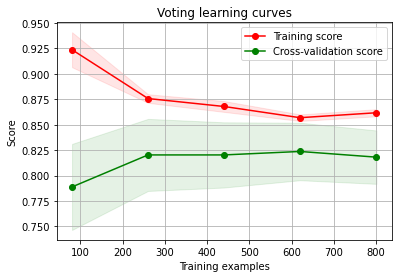

In [ ]:
plot_learning_curve(votingC,"Voting learning curves",X_train,Y_train,cv=kfold)